<a href="https://colab.research.google.com/github/ogut77/DataScience/blob/main/Copy_of_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

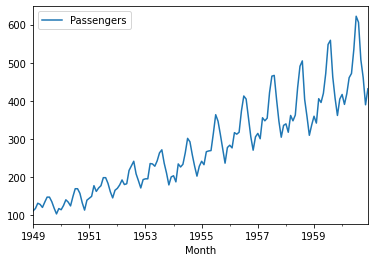

In [19]:
# dataframe opertations - pandas
import pandas as pd
import numpy as np
# plotting data - matplotlib
from matplotlib import pyplot as plt
# time series - statsmodels 
# Seasonality decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
# holt winters 
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
ap=pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv',index_col='Month',
                      parse_dates=True)
ap.plot()
plt.show()

# Set the value of Alpha and define m (Time Period)
m = 1
alpha = 1/(2*m)
# Set the frequency of the date time index as Monthly start as indicated by the data
ap.index.freq='MS'

In [ ]:
ap

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


# Decompose Series into Error Trend and Seasonal Component



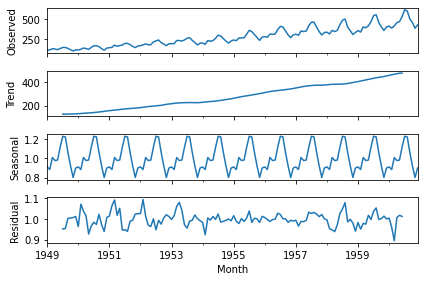

In [ ]:

decompose_result = seasonal_decompose(ap['Passengers'],model='multiplicative')
decompose_result.plot();

# Simple Moving Averages

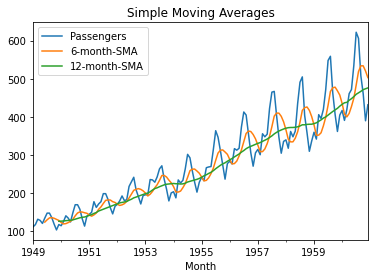

In [ ]:
ap['6-month-SMA'] = ap['Passengers'].rolling(window=6).mean()
ap['12-month-SMA'] = ap['Passengers'].rolling(window=12).mean()
ap.plot(title='Simple Moving Averages');

# Simple Exponential Smoothing

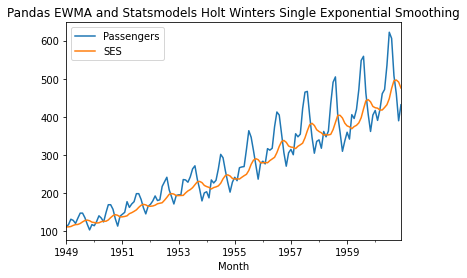

In [ ]:
span = 12
alpha = 2/(span+1)
ap['SES'] = SimpleExpSmoothing(ap['Passengers']).fit(smoothing_level=alpha,optimized=False).fittedvalues
ap[['Passengers','SES']].plot(title='Pandas EWMA and Statsmodels Holt Winters Single Exponential Smoothing');

# Double Exponential Smoothing

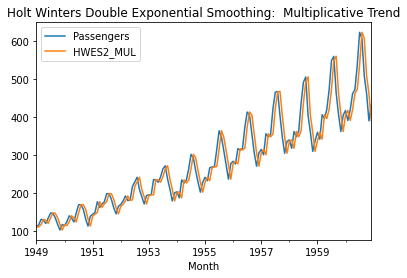

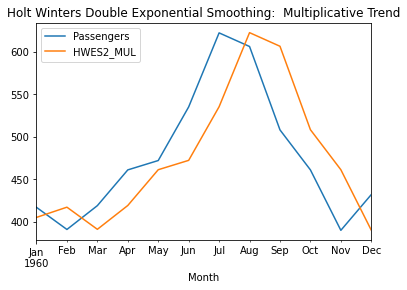

In [ ]:

ap['HWES2_MUL'] = ExponentialSmoothing(ap['Passengers'],trend='mul').fit().fittedvalues
ap[['Passengers','HWES2_MUL']].plot(title='Holt Winters Double Exponential Smoothing:  Multiplicative Trend')
ap[['Passengers','HWES2_MUL']][-12:].plot(title='Holt Winters Double Exponential Smoothing:  Multiplicative Trend');

# Triple Exponential Smoothing

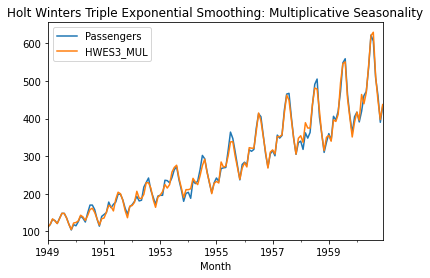

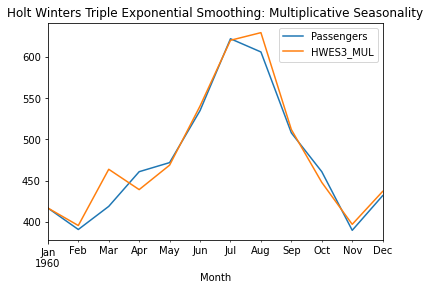

In [ ]:
ap['HWES3_MUL'] = ExponentialSmoothing(ap['Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
ap[['Passengers','HWES3_MUL']].plot(title='Holt Winters Triple Exponential Smoothing: Multiplicative Seasonality');
ap[['Passengers','HWES3_MUL']][-12:].plot(title='Holt Winters Triple Exponential Smoothing: Multiplicative Seasonality');

# TRAIN and TEST SPLIT

In [24]:


train = ap['Passengers'][:114]
test = ap['Passengers'][114:]
print("Full data shape is "+ str(ap.shape))
print("Train data shape is "+ str(train.shape))
print("Test data shape is "+ str(test.shape))

Full data shape is (144, 1)
Train data shape is (114,)
Test data shape is (30,)


Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

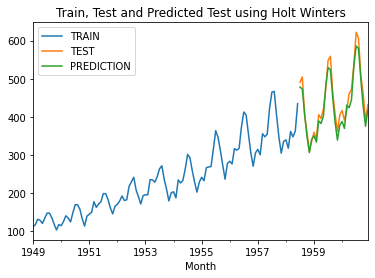

In [3]:
fitted_model = ExponentialSmoothing(train,trend='mul',seasonal='mul',seasonal_periods=12).fit()
test_predictions = ExponentialSmoothing(train,trend='mul',seasonal='mul',seasonal_periods=12).fit().forecast(30).rename('HW')
train.plot(legend=True,label='TRAIN')
test.plot(legend=True,label='TEST',figsize=(6,4))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters')


Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

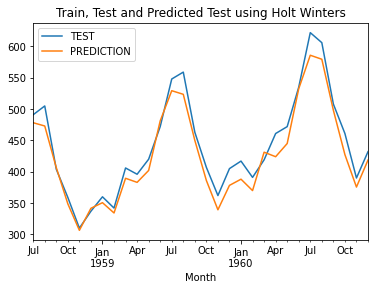

In [4]:
test.plot(legend=True,label='TEST',figsize=(6,4))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters')

In [5]:
#Evaluate forecasting Performance
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f'Mean Absolute Error = {mean_absolute_error(test,test_predictions)}')
print(f'Mean Squared Error = {mean_squared_error(test,test_predictions)}')
import numpy as np
def mape(actual,pred):
    return np.mean(np.abs((actual - pred) / actual)) * 100  
print(f'Mean Absolute Percentage Error = {mape(np.array(test),np.array(test_predictions) )}')

Mean Absolute Error = 17.97410163429237
Mean Squared Error = 430.4047016321292
Mean Absolute Percentage Error = 3.9847715293783432


Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

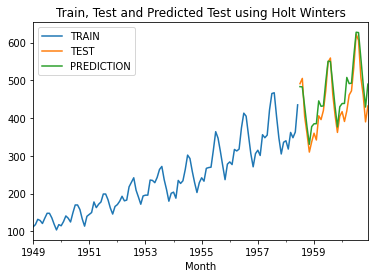

In [52]:
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
test_predictions = ETSModel(train,error="mul",
    trend="mul",
    seasonal="mul",
    damped_trend=False, seasonal_periods=12).fit().forecast(30)
train.plot(legend=True,label='TRAIN')
test.plot(legend=True,label='TEST',figsize=(6,4))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters')

In [58]:
a=["add","mul"]
for x in a:
  for y in a:
    for z in a:
      print(x)
      print(y)
      print(z)
      print(t)
      from statsmodels.tsa.exponential_smoothing.ets import ETSModel
      test_predictions = ETSModel(train,error=x, trend=y,seasonal=z,damped_trend=False, seasonal_periods=12).fit().forecast(30)
      from sklearn.metrics import mean_absolute_error,mean_squared_error
      print(f'Mean Absolute Error = {mean_absolute_error(test,test_predictions)}')
      print(f'Mean Squared Error = {mean_squared_error(test,test_predictions)}')
      import numpy as np
      def mape(actual,pred):
            return np.mean(np.abs((actual - pred) / actual)) * 100  
      print(f'Mean Absolute Percentage Error = {mape(np.array(test),np.array(test_predictions) )}')

add
add
add
False
Mean Absolute Error = 37.71739245444132
Mean Squared Error = 1995.7717052715223
Mean Absolute Percentage Error = 8.057997110520452
add
add
mul
False
Mean Absolute Error = 24.612527587246817
Mean Squared Error = 904.4769484139147
Mean Absolute Percentage Error = 5.261203933407398
add
mul
add
False
Mean Absolute Error = 20.048304446141778
Mean Squared Error = 663.103687223315
Mean Absolute Percentage Error = 4.182308771351488
add
mul
mul
False
Mean Absolute Error = 13.318329254454254
Mean Squared Error = 281.15681202579947
Mean Absolute Percentage Error = 3.073587704472589
mul
add
add
False
Mean Absolute Error = 47.398560310393826
Mean Squared Error = 2999.9469799071458
Mean Absolute Percentage Error = 10.229623280635112
mul
add
mul
False
Mean Absolute Error = 25.473350816389445
Mean Squared Error = 932.1293703199204
Mean Absolute Percentage Error = 5.51279103148942
mul
mul
add
False
Mean Absolute Error = 20.900642068308176
Mean Squared Error = 712.5066627925738
Mean Ab

In [68]:
a=["add","mul"]
for t in [True,False]:
 for x in a:
  for y in a:
    for z in a:
      print(x)
      print(y)
      print(z)
      print(t)
      test_predictions=ETSModel(train,error=x, trend=y,seasonal=z,damped_trend=t, seasonal_periods=12).fit().fittedvalues
      test=train
      print(f'Mean Absolute Error = {mean_absolute_error(test,test_predictions)}')
      print(f'Mean Squared Error = {mean_squared_error(test,test_predictions)}')
      import numpy as np
      def mape(actual,pred):
            return np.mean(np.abs((actual - pred) / actual)) * 100  
      print(f'Mean Absolute Percentage Error = {mape(np.array(test),np.array(test_predictions) )}')

add
add
add
True
Mean Absolute Error = 8.900871072385488
Mean Squared Error = 132.24874562334884
Mean Absolute Percentage Error = 4.137483478092444
add
add
mul
True
Mean Absolute Error = 5.685164564234886
Mean Squared Error = 53.822919833007106
Mean Absolute Percentage Error = 2.6927432484316465
add
mul
add
True
Mean Absolute Error = 8.03647454117429
Mean Squared Error = 114.31118254148934
Mean Absolute Percentage Error = 3.4634739116636877
add
mul
mul
True
Mean Absolute Error = 5.649886055525395
Mean Squared Error = 54.48578589332969
Mean Absolute Percentage Error = 2.6690161247298496
mul
add
add
True
Mean Absolute Error = 8.134751557967519
Mean Squared Error = 131.8012006780807
Mean Absolute Percentage Error = 3.2612351332426597
mul
add
mul
True
Mean Absolute Error = 6.2284199067575985
Mean Squared Error = 63.5352681199098
Mean Absolute Percentage Error = 2.7382541059793275
mul
mul
add
True
Mean Absolute Error = 8.23177180047203
Mean Squared Error = 132.49078262582867
Mean Absolute P

Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

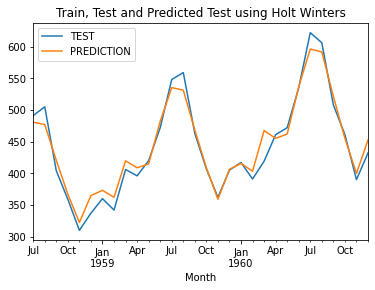

In [61]:
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
test_predictions = ETSModel(train,error='add', trend='mul',seasonal='mul',damped_trend=False, seasonal_periods=12).fit().forecast(30)
test.plot(legend=True,label='TEST',figsize=(6,4))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters')